In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/nifty-500/nifty_500_quarterly_results new.csv')

# Display basic details
num_rows, num_columns = data.shape
columns_names = data.columns.tolist()

num_rows, num_columns, columns_names


(501,
 17,
 ['name',
  'NSE_code',
  'BSE_code',
  'sector',
  'industry',
  'revenue',
  'operating_expenses',
  'operating_profit',
  'operating_profit_margin',
  'depreciation',
  'interest',
  'profit_before_tax',
  'tax',
  'net_profit',
  'EPS',
  'profit_TTM',
  'EPS_TTM'])

In [2]:
# Summary statistics of numerical features
numerical_summary = data.describe()

numerical_summary


,EPS,EPS_TTM
count,500.000000,498.000000
mean,15.252400,54.043775
std,66.113983,193.529196
min,-32.400000,-214.800000
25%,2.100000,8.900000
50%,5.350000,22.400000
75%,14.200000,52.675000
max,1383.300000,3988.000000


In [3]:
# Number of unique companies, sectors, and industries
num_unique_companies = data['name'].nunique()
unique_sectors = data['sector'].unique()
unique_industries = data['industry'].unique()

num_unique_companies, unique_sectors, unique_industries


(501,
 array(['GENERAL INDUSTRIALS', 'CEMENT AND CONSTRUCTION',
        'METALS & MINING', 'BANKING AND FINANCE', 'TRANSPORTATION',
        'UTILITIES', 'RETAILING', 'OIL & GAS',
        'PHARMACEUTICALS & BIOTECHNOLOGY', 'AUTOMOBILES & AUTO COMPONENTS',
        'DIVERSIFIED CONSUMER SERVICES', 'CHEMICALS & PETROCHEMICALS',
        'FOOD BEVERAGES & TOBACCO', 'DIVERSIFIED', 'TELECOM SERVICES',
        'CONSUMER DURABLES', 'REALTY', 'FMCG', 'FOREST MATERIALS',
        'FERTILIZERS', 'COMMERCIAL SERVICES & SUPPLIES',
        'SOFTWARE & SERVICES', 'TELECOMMUNICATIONS EQUIPMENT',
        'HOTELS RESTAURANTS & TOURISM', 'TEXTILES APPARELS & ACCESSORIES',
        'MEDIA', 'OTHERS', 'HEALTHCARE EQUIPMENT & SUPPLIES'], dtype=object),
 array(['INDUSTRIAL MACHINERY', 'CEMENT & CEMENT PRODUCTS',
        'OTHER INDUSTRIAL GOODS', 'IRON & STEEL PRODUCTS', 'BANKS',
        'MARINE PORT & SERVICES', 'ELECTRIC UTILITIES',
        'DEPARTMENT STORES', 'OIL MARKETING & DISTRIBUTION',
        'PHARMACEU

**Can you provide a sector-wise distribution of companies in the Nifty 500?**

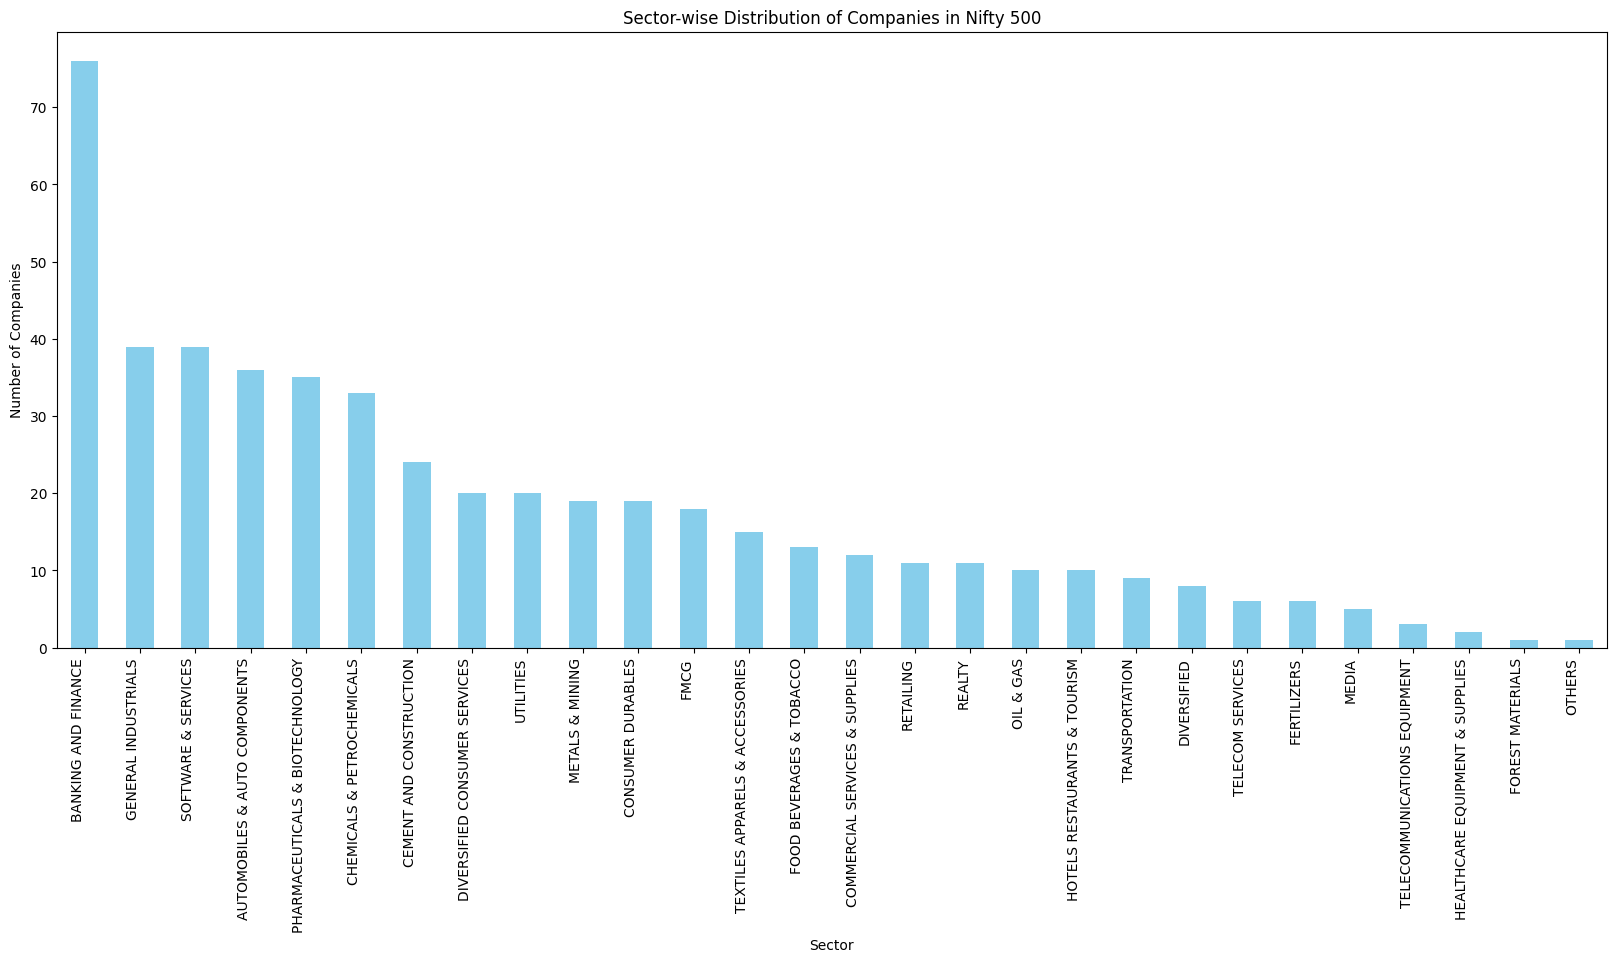

In [4]:
import matplotlib.pyplot as plt

# Sector-wise distribution
plt.figure(figsize=(20, 8))
data['sector'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sector-wise Distribution of Companies in Nifty 500')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90, ha='right')
plt.show()


**Which companies have the highest net profit on average?**

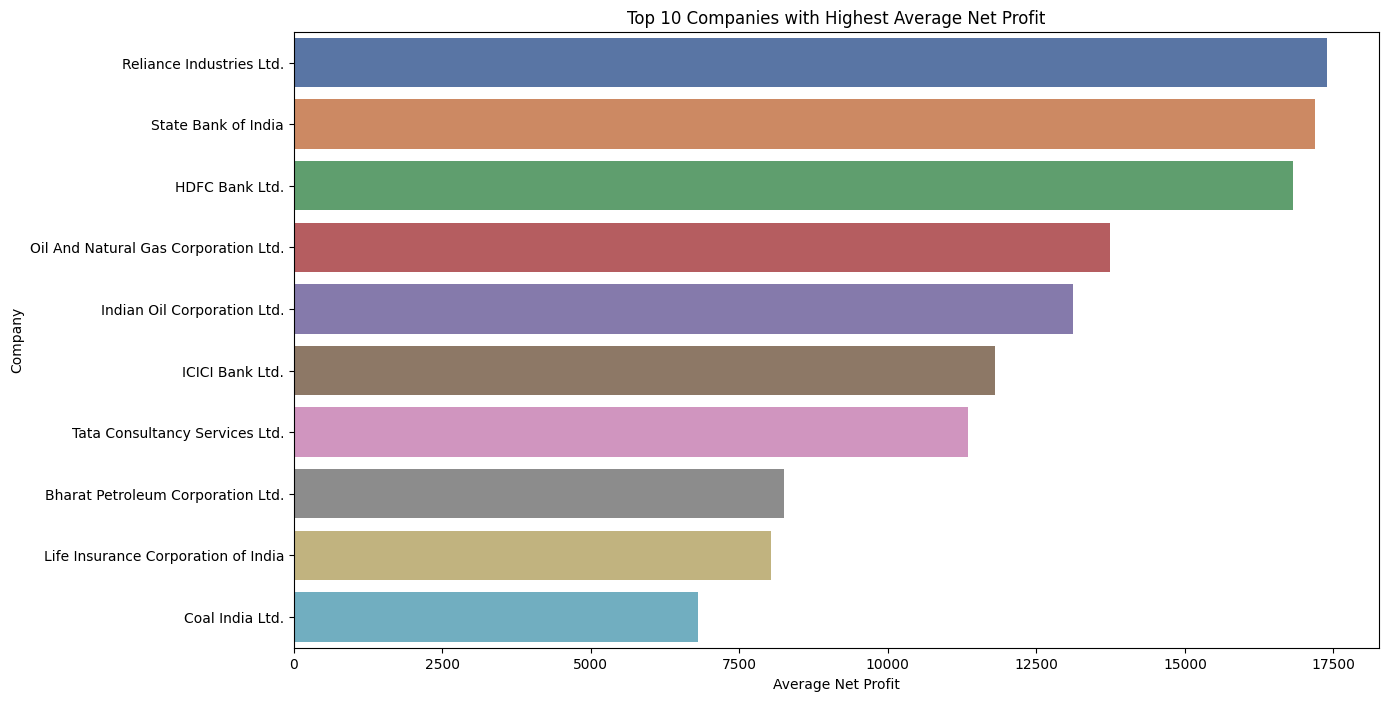

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove commas and convert 'net_profit' to numeric
data['net_profit'] = data['net_profit'].replace(',', '', regex=True).astype(float)

# Companies with the highest average net profit
top_net_profit_companies = data.groupby('name')['net_profit'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_net_profit_companies.values, y=top_net_profit_companies.index, palette='deep')
plt.title('Top 10 Companies with Highest Average Net Profit')
plt.xlabel('Average Net Profit')
plt.ylabel('Company')
plt.show()


**What are the top 10 companies with the highest EPS (Earnings Per Share)?**

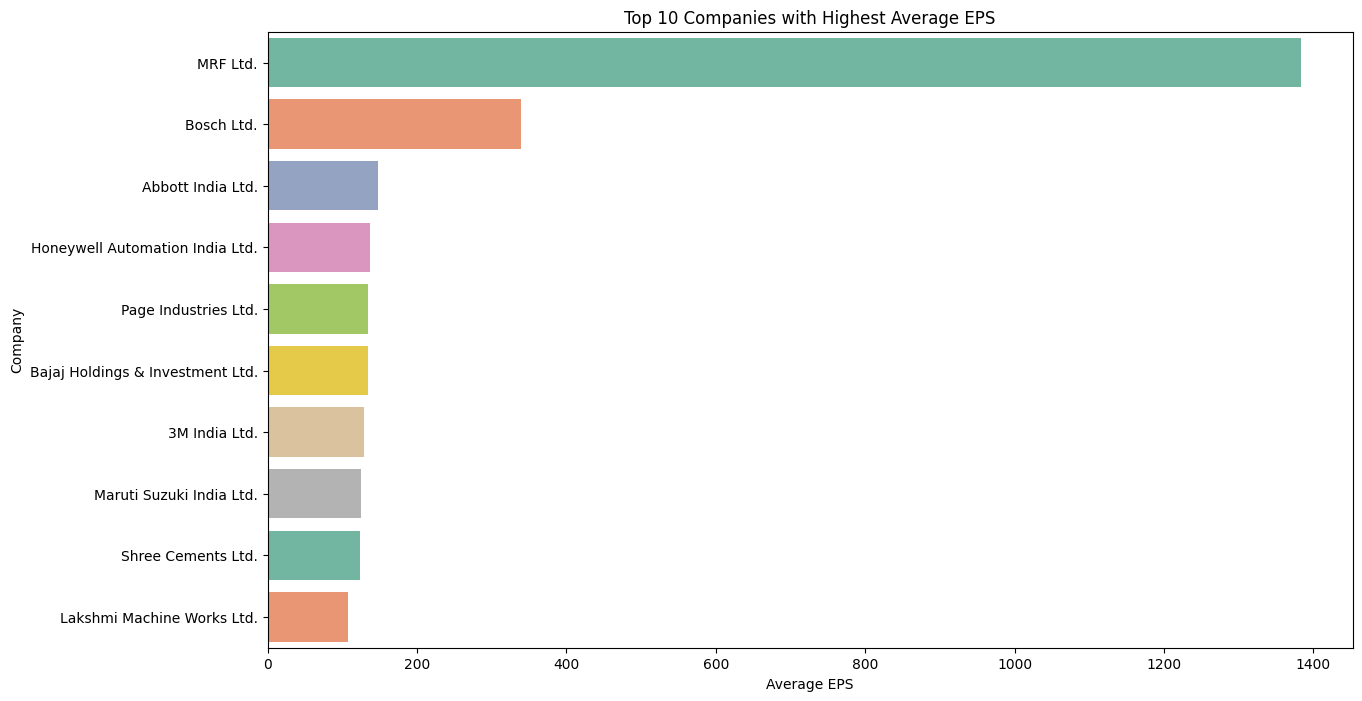

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 companies with the highest EPS
top_eps_companies = data.groupby('name')['EPS'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_eps_companies.values, y=top_eps_companies.index, palette='Set2')
plt.title('Top 10 Companies with Highest Average EPS')
plt.xlabel('Average EPS')
plt.ylabel('Company')
plt.show()


**How does the average TTM (Trailing Twelve Months) EPS vary across different sectors?**

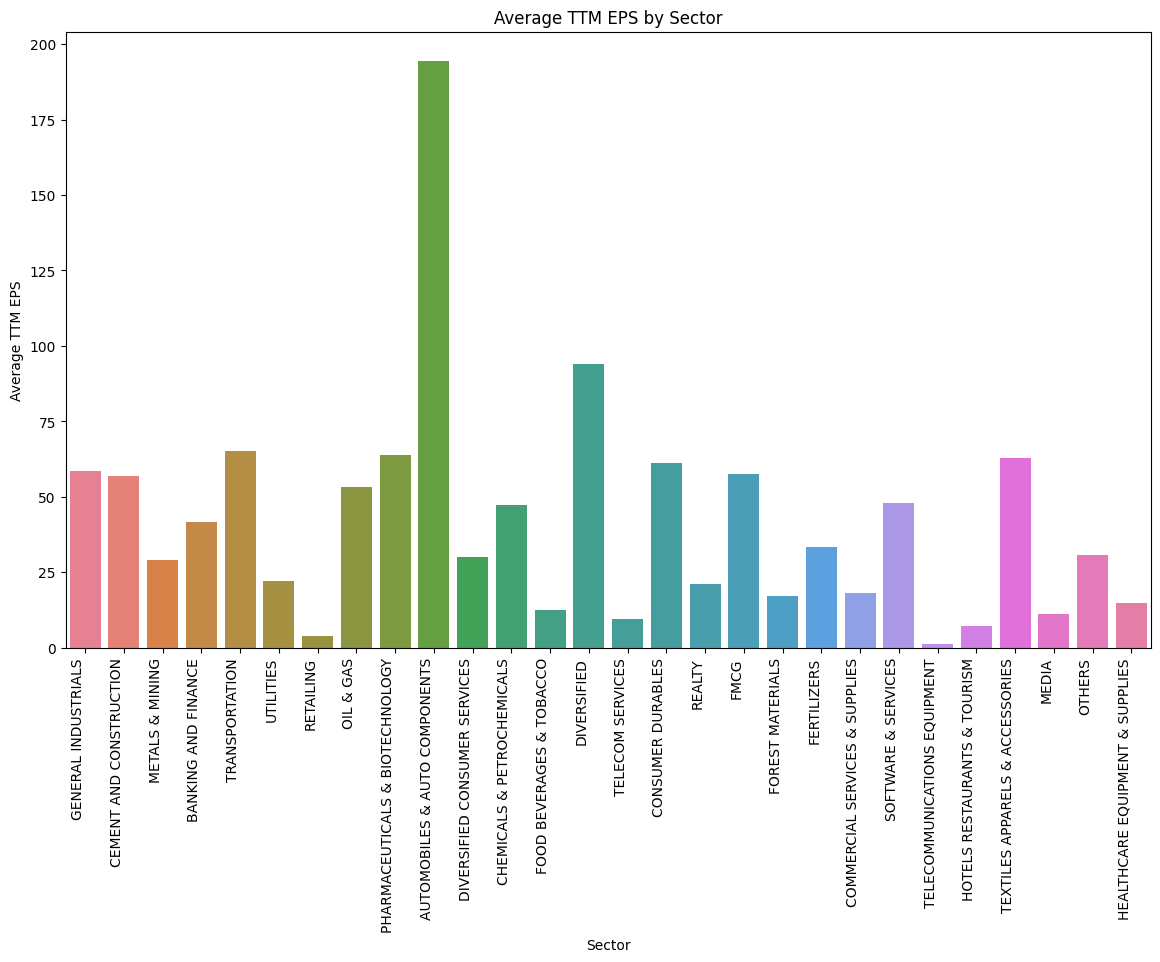

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average TTM EPS by sector
plt.figure(figsize=(14, 8))
sns.barplot(x='sector', y='EPS_TTM', data=data, errorbar=None, palette='husl')
plt.title('Average TTM EPS by Sector')
plt.xlabel('Sector')
plt.ylabel('Average TTM EPS')
plt.xticks(rotation=90, ha='right')
plt.show()


**What is the relationship between EPS and net profit for companies in the dataset?**

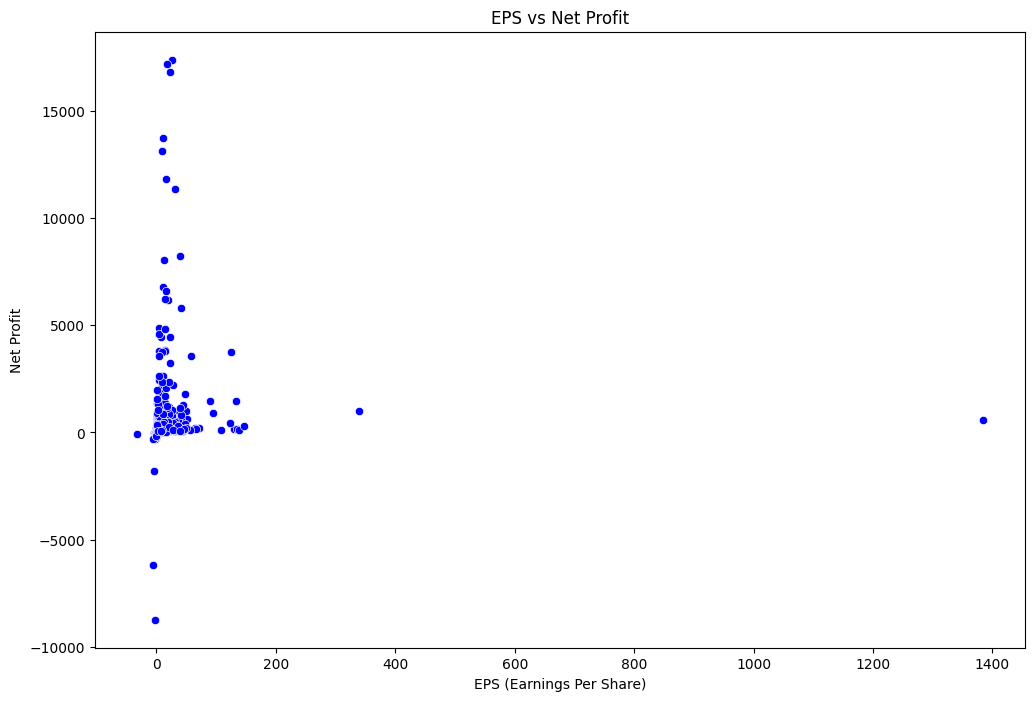

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of EPS vs net profit
plt.figure(figsize=(12, 8))
sns.scatterplot(x='EPS', y='net_profit', data=data, color='blue')
plt.title('EPS vs Net Profit')
plt.xlabel('EPS (Earnings Per Share)')
plt.ylabel('Net Profit')
plt.show()


**Is there a relationship between operating expenses and net profit for companies in the dataset?**

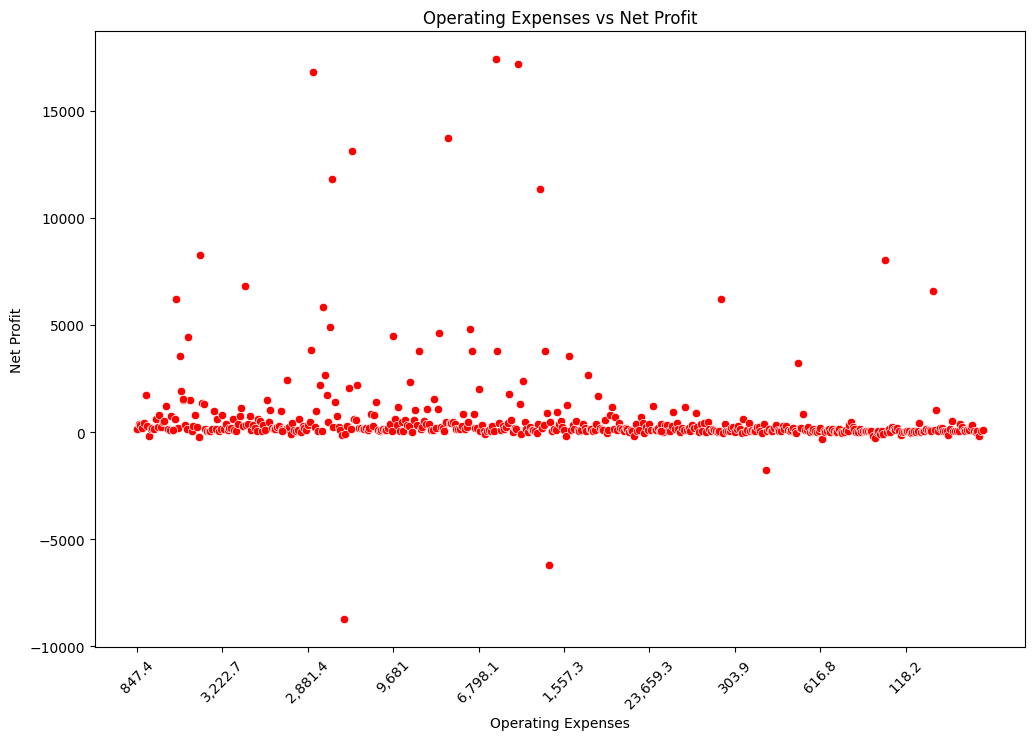

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of operating expenses vs net profit
plt.figure(figsize=(12, 8))
sns.scatterplot(x='operating_expenses', y='net_profit', data=data, color='red')

# Set x-axis ticks to only 10 points
plt.xticks(plt.xticks()[0][::len(data['operating_expenses'])//10], rotation=45)

plt.title('Operating Expenses vs Net Profit')
plt.xlabel('Operating Expenses')
plt.ylabel('Net Profit')
plt.show()



**How does the distribution of profit before tax vary across different industries in the dataset?**

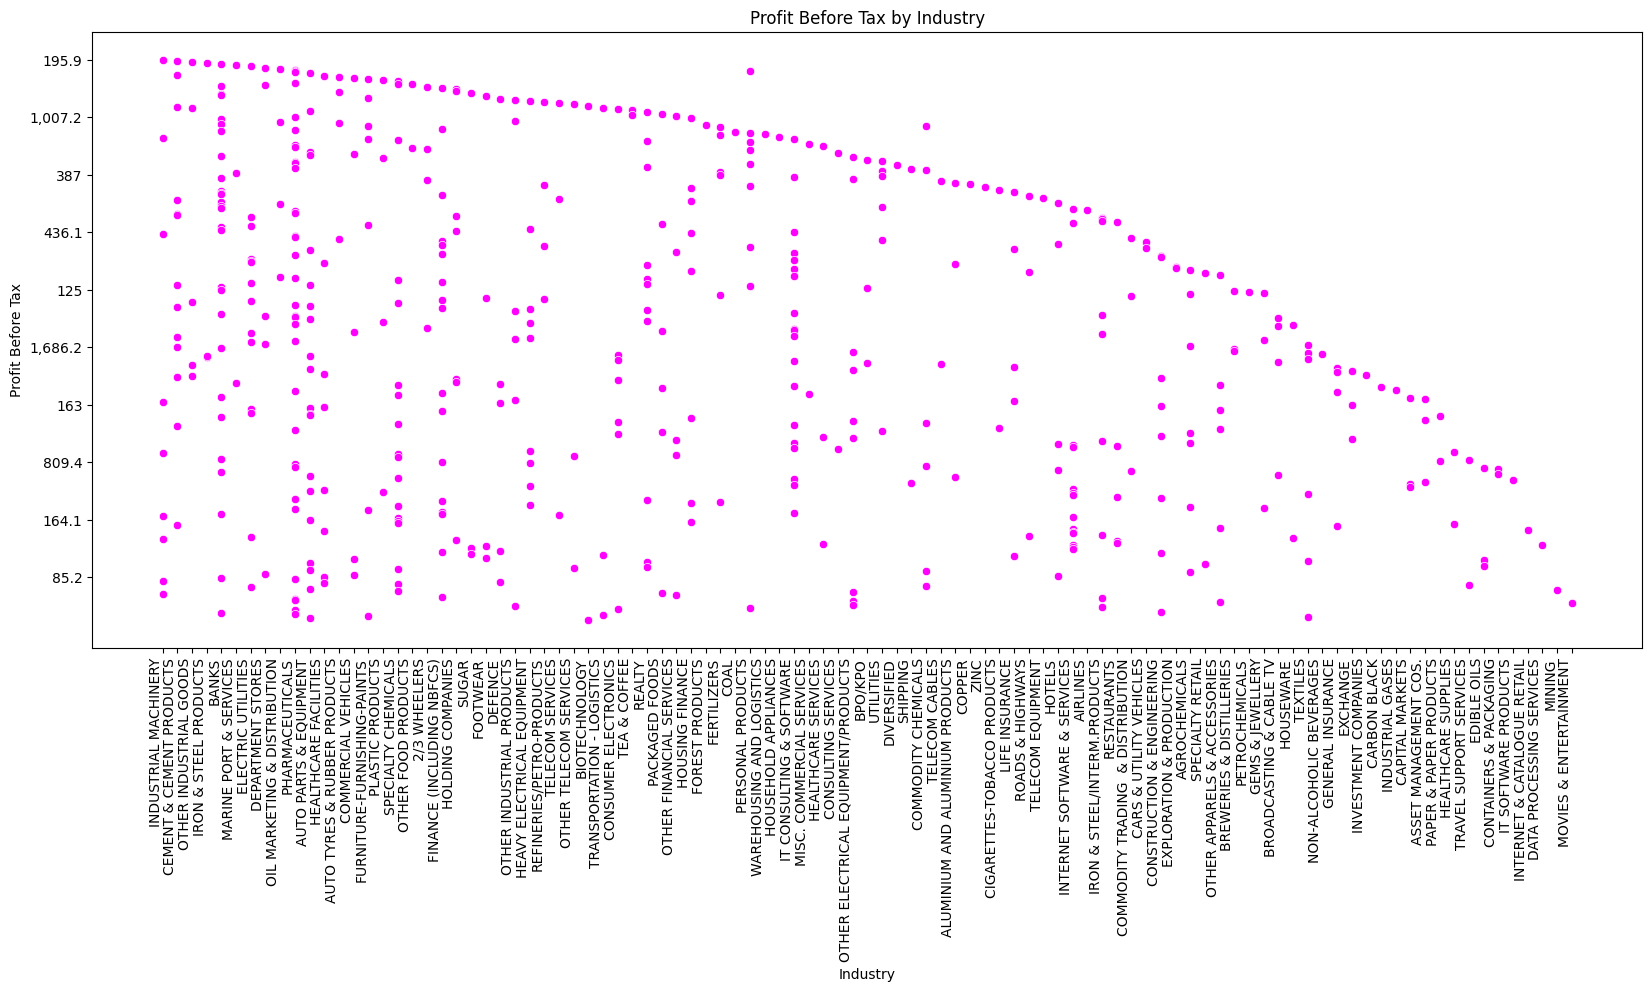

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of profit before tax by industry
plt.figure(figsize=(20, 8))
sns.scatterplot(x='industry', y='profit_before_tax', data=data, color='magenta')

# Set y-axis ticks to only 10 points
plt.yticks(plt.yticks()[0][::len(data['profit_before_tax'])//10])

plt.title('Profit Before Tax by Industry')
plt.xlabel('Industry')
plt.ylabel('Profit Before Tax')
plt.xticks(rotation=90, ha='right')
plt.show()


**What is the distribution of companies in the dataset across different sectors using a pie chart?**

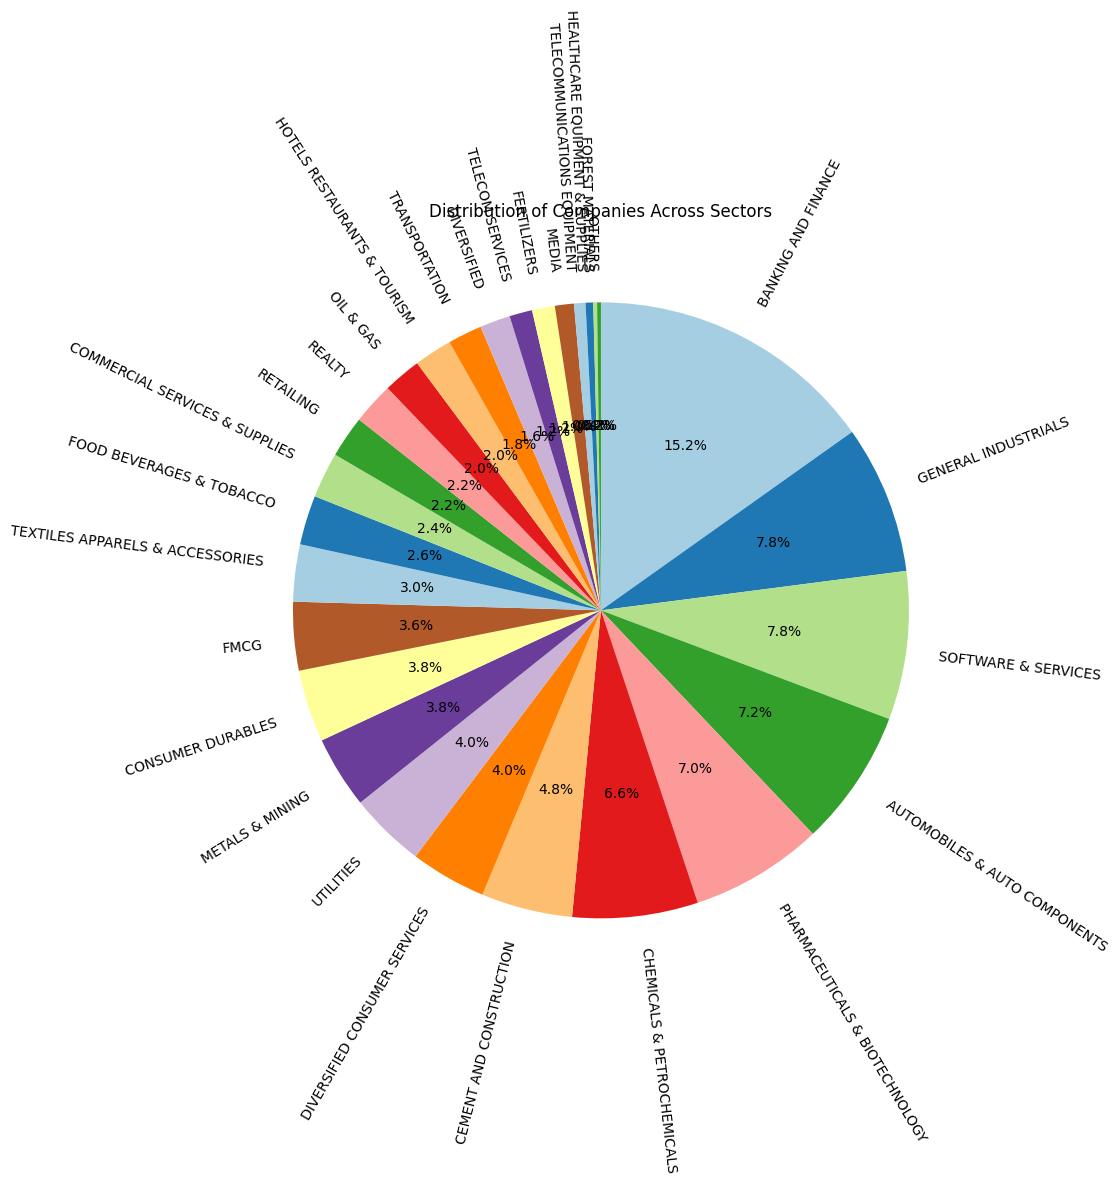

In [11]:
import matplotlib.pyplot as plt

# Pie chart of sector distribution
sector_distribution = data['sector'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(sector_distribution, labels=sector_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, rotatelabels=True, counterclock=False)
plt.title('Distribution of Companies Across Sectors')
plt.show()



**What is the proportion of companies in the dataset with positive net profit and negative net profit?**

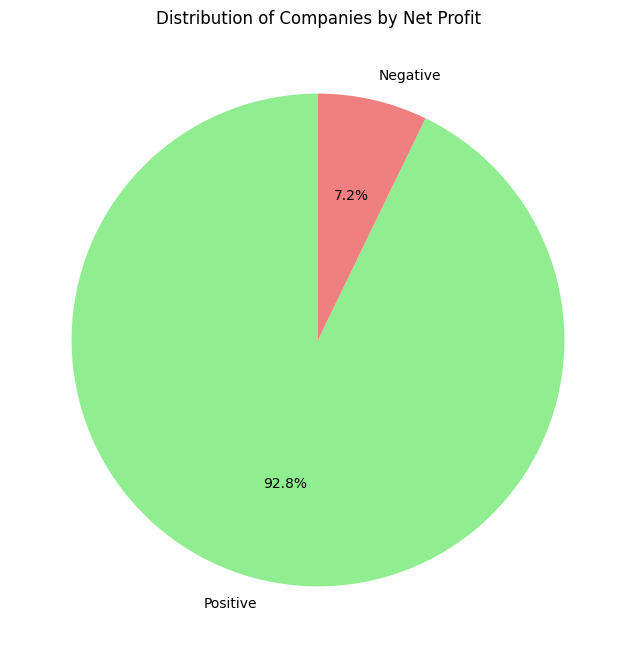

In [12]:
import matplotlib.pyplot as plt

# Pie chart of net profit distribution
net_profit_distribution = data['net_profit'].apply(lambda x: 'Positive' if x > 0 else 'Negative').value_counts()

plt.figure(figsize=(8, 8))
plt.pie(net_profit_distribution, labels=net_profit_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Companies by Net Profit')
plt.show()


**Can you provide a pair plot showing the relationships between key financial metrics such as revenue, operating profit, net profit, and EPS?**

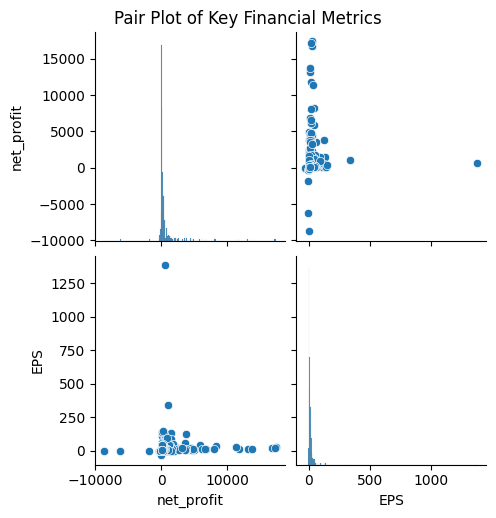

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting key financial metrics for pair plot
financial_metrics = data[['revenue', 'operating_profit', 'net_profit', 'EPS']]

# Pair plot of key financial metrics
sns.pairplot(financial_metrics)
plt.suptitle('Pair Plot of Key Financial Metrics', y=1.02)
plt.show()


**How are revenue, operating profit margin, and EPS distributed across different sectors in the dataset?**

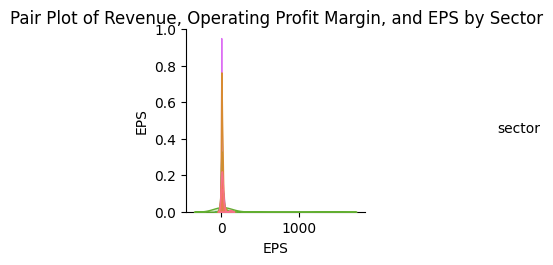

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting metrics for pair plot
selected_metrics = data[['revenue', 'operating_profit_margin', 'EPS', 'sector']]

# Pair plot of selected metrics
sns.pairplot(selected_metrics, hue='sector', palette='husl')
plt.suptitle('Pair Plot of Revenue, Operating Profit Margin, and EPS by Sector', y=1.02)
plt.show()


**Can you visualize the relationships between profit before tax, interest, and net profit in the pair plot, distinguishing between different industries?**

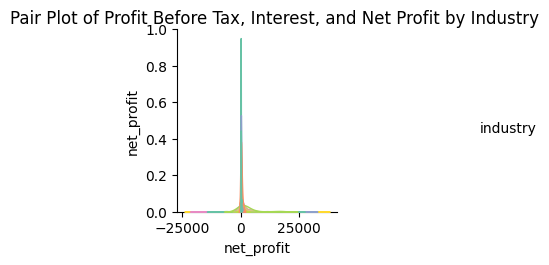

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting metrics for pair plot
selected_metrics_industry = data[['profit_before_tax', 'interest', 'net_profit', 'industry']]

# Pair plot of selected metrics by industry
sns.pairplot(selected_metrics_industry, hue='industry', palette='Set2')
plt.suptitle('Pair Plot of Profit Before Tax, Interest, and Net Profit by Industry', y=1.02)
plt.show()


**How are the relationships between revenue, operating expenses, and net profit visualized in a pair plot, considering different sectors?**

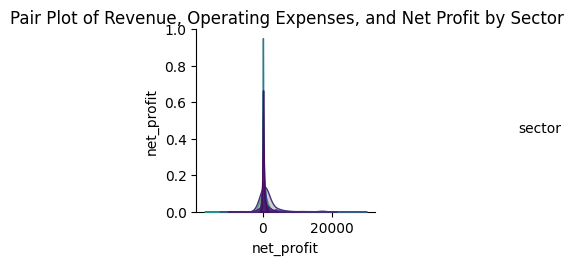

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting metrics for pair plot
selected_metrics_sector = data[['revenue', 'operating_expenses', 'net_profit', 'sector']]

# Pair plot of selected metrics by sector
sns.pairplot(selected_metrics_sector, hue='sector', palette='viridis')
plt.suptitle('Pair Plot of Revenue, Operating Expenses, and Net Profit by Sector', y=1.02)
plt.show()
